In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_io as io

from pathlib import Path

/Users/shhong/Documents/Ines/pycabnn/notebooks/fig_NETSIM/data_io/nrnvector.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# boutput_path = Path('/Users/shhong/Dropbox/network_data/output.5028956/') #BREP
# poutput_path = Path('/Users/shhong/Dropbox/network_data/output.5030124/') #PyBREP
boutput_path = Path('../../test_data/simulation_data/BREP/') #BREP
poutput_path = Path('../../test_data/simulation_data/Pycabnn/') #Pycabnn

bout = io.OutputReader(boutput_path)
pout = io.OutputReader(poutput_path)

df_b = bout.read_connectivity('aa', 'goc')
df_p = pout.read_connectivity('aa', 'goc')

gocp = pout.read_spike_data('goc')
gocb = bout.read_spike_data('goc')
# srcs = np.load(output_path / 'Axon.npy')
# tgts = np.load(output_path / 'AAtoGoCtargets.npy')
# grcxy = np.loadtxt(output_path / 'GCcoordinates.sorted.dat')
# gocxy = np.loadtxt(output_path / 'GoCcoordinates.sorted.dat')

# df = dd.from_array(np.vstack((srcs, tgts)).T, columns=('src', 'tgt'))

Used set = set3005
Used set = set3005
Found  1089742 connections to 1995 cells.



Found  1088896 connections to 1995 cells.



Found  51682 spikes from 1995 cells.



Found  50836 spikes from 1995 cells.


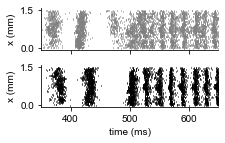

In [3]:
_, axs = plt.subplots(figsize=(8.5/2.54, 8.5/2.54*5/8), nrows=2, sharex=True)
axs[0].plot(gocb['time'], gocb['x']/1e3, '|', c='grey', markersize=1)
axs[1].plot(gocp['time'], gocp['x']/1e3, '|k', markersize=1)
axs[0].set(yticks=[0, 1.5], ylabel='x (mm)')
axs[1].set(xlim=[350, 650], xlabel='time (ms)', yticks=[0, 1.5], ylabel='x (mm)')
plt.tight_layout()
plt.savefig('goc_x.jpg', dpi=600)
plt.savefig('goc_x.pdf', dpi=600)

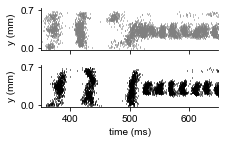

In [4]:
_, axs = plt.subplots(figsize=(8.5/2.54, 8.5/2.54*5/8), nrows=2, sharex=True)
axs[0].plot(gocb['time'], gocb['y']/1e3, '|', c='grey', markersize=1)
axs[1].plot(gocp['time'], gocp['y']/1e3, '|k', markersize=1)
axs[0].set(yticks=[0, 0.7], ylabel='y (mm)')
axs[1].set(xlim=[350, 650], xlabel='time (ms)', yticks=[0, 0.7], ylabel='y (mm)')
plt.tight_layout()
plt.savefig('goc_y.jpg', dpi=600)
plt.savefig('goc_y.pdf', dpi=600)

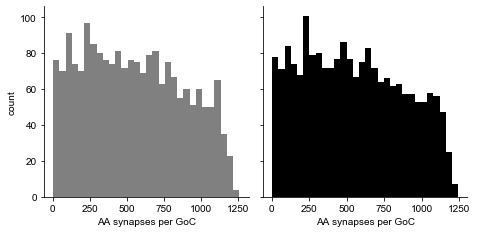

In [5]:
bcons_per_goc = df_b.groupby('cell').count()
pcons_per_goc = df_p.groupby('cell').count()

_, axs = plt.subplots(ncols=2, figsize=(8.5/2.54*2, 8.5/2.54), sharey=True)
_ = axs[0].hist(bcons_per_goc['pre'], 30, color='grey')
_ = axs[1].hist(pcons_per_goc['pre'], 30, color='k')
axs[0].set(xlabel='AA synapses per GoC', ylabel='count')
axs[1].set(xlabel='AA synapses per GoC')

plt.tight_layout()
plt.savefig('aa_goc.jpg', dpi=600)
plt.savefig('aa_goc.pdf', dpi=600)

Found  9089050 connections to 1995 cells.



Found  9117192 connections to 1995 cells.


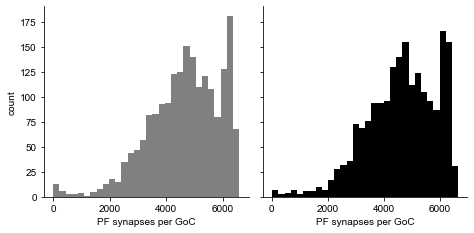

In [6]:
df_b = bout.read_connectivity('pf', 'goc')
df_p = pout.read_connectivity('pf', 'goc')

bcons_per_goc = df_b.groupby('cell').count()
pcons_per_goc = df_p.groupby('cell').count()

_, axs = plt.subplots(ncols=2, figsize=(8.5/2.54*2, 8.5/2.54), sharey=True)
_ = axs[0].hist(bcons_per_goc['pre'], 30, color='grey')
_ = axs[1].hist(pcons_per_goc['pre'], 30, color='k')
axs[0].set(xlabel='PF synapses per GoC', ylabel='count')
axs[1].set(xlabel='PF synapses per GoC')

plt.tight_layout()
plt.savefig('pf_goc.jpg', dpi=600)
plt.savefig('pf_goc.pdf', dpi=600)